# Practical Guidance for Firefighter Applicants Preparing for Cardiorespiratory Fitness Testing

### Authors: Sylvie Fortier, Liam P. Kelly, Fabien A. Basset

## 1) Data Inspection and Cleaning

In [1]:
# If it is your first time running the code, please install the following library
#!pip install scipy pandas pingouin

In [2]:
# List of libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import t
import pingouin as pg
import math
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read firefighter fitness test data

df = pd.read_excel('Master_raw.xlsx', sheet_name='All')

In [4]:
df.head(3)

ID  Pass       AbsVO2     RelVO2  MHR   HR_2   EE   SE   TE         VCO2  \
0   1     1  3979.333333  49.233333  207  173.0  320    0  320  4017.333333   
1   2     1  4263.666667  48.433333  191  129.0  105  240  345  4074.666667   
2   3     1  4400.666667  52.966667  201  165.0  420  300  720  4255.333333   

           VE         BF       RER  Age  Height    BM  
0  136.666667  46.666667  1.010000   19   184.2  80.8  
1  134.000000  54.333333  0.956667   24   184.3  88.1  
2  163.000000  55.666667  0.966667   21   178.0  83.1

In [5]:
# Rearrange columns
df = df[['ID', 'Pass', 'Age', 'Height', 'BM', 'EE', 'SE', 'TE','MHR','HR_2','RelVO2','AbsVO2','VCO2','VE','BF','RER']]

In [6]:
# Check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      121 non-null    int64  
 1   Pass    121 non-null    int64  
 2   Age     121 non-null    int64  
 3   Height  121 non-null    float64
 4   BM      121 non-null    float64
 5   EE      121 non-null    int64  
 6   SE      121 non-null    int64  
 7   TE      121 non-null    int64  
 8   MHR     121 non-null    int64  
 9   HR_2    119 non-null    float64
 10  RelVO2  121 non-null    float64
 11  AbsVO2  121 non-null    float64
 12  VCO2    119 non-null    float64
 13  VE      119 non-null    float64
 14  BF      119 non-null    float64
 15  RER     119 non-null    float64
dtypes: float64(9), int64(7)
memory usage: 15.2 KB


Note: all Dtype are good to go

In [7]:
# Check for duplicates
df.duplicated().any()

False

In [8]:
# Check number of observations and columns
df.shape

(121, 16)

Note: total of 121 observations

In [9]:
# Check for negatives
df.agg(lambda x: sum(x < 0)).sum()

0

In [10]:
# Check for missing values (should be < 10% for each column)
df.isnull().sum()

ID        0
Pass      0
Age       0
Height    0
BM        0
EE        0
SE        0
TE        0
MHR       0
HR_2      2
RelVO2    0
AbsVO2    0
VCO2      2
VE        2
BF        2
RER       2
dtype: int64

Note: missing value for HR_2, VCO2, VE, BF, and RER

In [11]:
# Fill in the missing values in 'HR_2' by replacing with the mean for SG or UG
df['HR_2'].fillna(df.groupby(["Pass"])['HR_2'].transform('mean'), inplace=True)

In [12]:
# Create a column for heart rate recovery (MHR - HR after 2 min of recovery)
df['HRR'] = df.MHR - df.HR_2

In [13]:
# Descriptive analysis for the entire dataset
df.describe()

ID        Pass         Age      Height          BM  \
count  121.000000  121.000000  121.000000  121.000000  121.000000   
mean    61.000000    0.719008   26.338843  178.597521   84.882231   
std     35.073732    0.451352    5.838884    6.232274   10.670276   
min      1.000000    0.000000   18.000000  160.000000   66.450000   
25%     31.000000    0.000000   22.000000  174.000000   78.450000   
50%     61.000000    1.000000   25.000000  178.900000   83.650000   
75%     91.000000    1.000000   29.000000  183.000000   90.150000   
max    121.000000    1.000000   44.000000  194.600000  122.200000   

                EE          SE           TE         MHR        HR_2  \
count   121.000000  121.000000   121.000000  121.000000  121.000000   
mean    206.157025  197.991736   404.148760  195.099174  155.233933   
std     197.731679  170.914964   277.953253    9.316120   15.268926   
min       0.000000    0.000000     0.000000  171.000000  123.000000   
25%      90.000000   30.000000   220.000000  189.000000  145.000000   
50%     150.000000  180.000000   340.000000  195.000000  154.000000   
75%     300.000000  300.000000   580.000000  201.000000  165.000000   
max    1560.000000  720.000000  1680.000000  219.000000  193.000000   

           RelVO2       AbsVO2         VCO2          VE          BF  \
count  121.000000   121.000000   119.000000  119.000000  119.000000   
mean    46.514304  3928.231163  3802.090629  129.776547   50.191630   
std      6.425268   590.771509   573.918142   19.709578    8.140828   
min     30.733333  2632.700000  2441.800000   80.666667   29.666667   
25%     41.833333  3479.000000  3415.916667  116.666667   44.666667   
50%     46.600000  3870.333333  3749.000000  129.333333   50.333333   
75%     50.500000  4347.500000  4161.666667  141.833333   55.166667   
max     61.650000  6006.000000  5781.333333  194.333333   74.000000   

              RER         HRR  
count  119.000000  121.000000  
mean     0.976299   39.865241  
std      0.039426   11.494198  
min      0.823333    0.000000  
25%      0.955000   34.000000  
50%      0.976667   40.000000  
75%      1.003333   48.000000  
max      1.080952   69.000000

Note: there is a problem with HRR because values should be >= 20 bpm (difference between MHR and HR after 2 min of recovery). The problem probably comes from a wrong value of HR_2 entered. 

In [14]:
# Check MHR and HR_2 associated with low values of HRR
df.sort_values('HRR', ascending=True)[['HRR','HR_2','Pass']].head(7)

HRR   HR_2  Pass
3     0.0  192.0     1
64    6.0  176.0     1
19   12.0  181.0     0
101  15.0  193.0     1
111  16.0  189.0     1
48   18.0  174.0     1
8    23.0  169.0     1

Note: ID #3 and #64 are considered wrong values of HR_2 entered because if applicants would not have recovered faster than 10 bpm in 2 min, an intervention from the exercise physiologist adminitering the test would have been necessary and this did not happen. The MHR value was automatically detected by the metabolic system during the test but the HR_2 was manually recorded by the exercise physiologist assistant. Consequently, I suspect that the assistant miscalculated the HR_2 and the values should be replaced by the mean value of HR_2 (from SG) for these 2 observations. 

In [15]:
# Replace the miscalculated HR_2 for ID #3 & #64 with the mean from SG
df.loc[3, 'HR_2'] = df[df['Pass']==1]['HR_2'].mean()
df.loc[64, 'HR_2'] = df[df['Pass']==1]['HR_2'].mean()

# Recalculate HRR
df['HRR'] = df.MHR - df.HR_2

# Re-check HRR values in ascending order
df.sort_values('HRR', ascending=True)[['HRR']].head()

HRR
19   12.0
101  15.0
111  16.0
48   18.0
8    23.0

## 2) Exploratory Data Analysis

In [16]:
# Descriptive analysis per group (SG vs UG)
df.groupby('Pass').aggregate(['mean','std','min','max'])[['Age', 'Height', 'BM', 'EE', 'SE', 'TE','MHR','HRR','RelVO2','AbsVO2','VCO2','VE','BF','RER']].T

Pass                   0            1
Age    mean    28.411765    25.528736
       std      7.435043     4.898598
       min     20.000000    18.000000
       max     44.000000    39.000000
Height mean   179.176471   178.371264
       std      7.853008     5.508976
       min    160.200000   160.000000
       max    194.600000   190.100000
BM     mean    90.354412    82.743678
       std     13.717261     8.378529
       min     66.850000    66.450000
       max    122.200000   105.200000
EE     mean   141.470588   231.436782
       std    118.331388   216.520996
       min      0.000000     0.000000
       max    460.000000  1560.000000
SE     mean   156.323529   214.275862
       std    150.359714   176.439705
       min      0.000000     0.000000
       max    480.000000   720.000000
TE     mean   297.794118   445.712644
       std    216.158581   289.228521
       min      0.000000     0.000000
       max    920.000000  1680.000000
MHR    mean   194.588235   195.298851
       std      9.875337     9.139888
       min    171.000000   174.000000
       max    213.000000   219.000000
HRR    mean    36.588235    41.837049
       std     10.087849    10.339881
       min     12.000000    15.000000
       max     61.000000    69.000000
RelVO2 mean    38.687233    49.573159
       std      2.785866     4.576236
       min     30.733333    43.000000
       max     42.066667    61.650000
AbsVO2 mean  3491.315133  4098.979957
       std    454.767419   550.153526
       min   2632.700000  3060.000000
       max   4593.666667  6006.000000
VCO2   mean  3362.167592  3970.898306
       std    431.708000   532.098604
       min   2441.800000  2859.000000
       max   4158.000000  5781.333333
VE     mean   116.277359   134.956467
       std     18.165598    17.808944
       min     80.666667   105.000000
       max    146.092857   194.333333
BF     mean    47.701355    51.147200
       std      8.356908     7.898052
       min     29.666667    35.333333
       max     64.800000    74.000000
RER    mean     0.973815     0.977252
       std      0.048205     0.035773
       min      0.823333     0.883333
       max      1.080952     1.060000

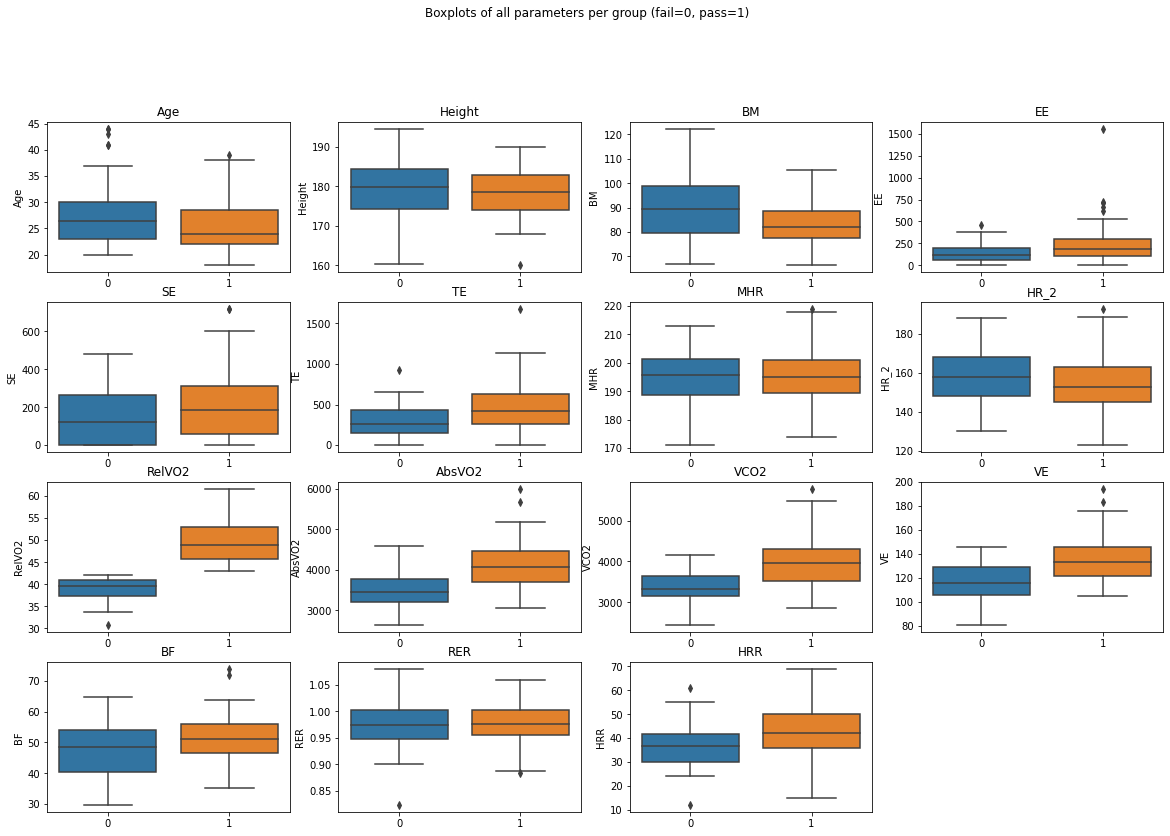

In [17]:
# Boxplot to visually identify potential outliers
fig = plt.figure(figsize=(20,16))
count = 1

for col in df.columns[2:]:
    plt.subplot(5,4,count)
    plt.title(col)
    sns.boxplot(x='Pass', y=col, data=df)
    plt.xlabel('')
    count += 1
    
plt.suptitle('Boxplots of all parameters per group (fail=0, pass=1)');

Note: according to boxplot, there are potential outliers in all variables. A second method to detect outliers should be used. 

In [18]:
# Check outliers by converting values into z-score where ± 3 SD away is considered an outlier

# Calculate z-scores
df_z = df.apply(lambda x: stats.zscore(x))

# Locate outliers (z-score > 3 or < -3)
outliers = df_z.stack()[(df_z.stack() > 3) | (df_z.stack() < -3)].unstack()
print('Number of variables with outliers: ', outliers.shape[1], '\n')

# Display values > 3 or < -3
outliers

Number of variables with outliers:  6 



SE        BM       Age    AbsVO2        EE        TE
23   3.066898       NaN       NaN       NaN       NaN       NaN
50        NaN  3.511900       NaN       NaN       NaN       NaN
67        NaN       NaN  3.037326       NaN       NaN       NaN
76        NaN       NaN  3.037326       NaN       NaN       NaN
88        NaN       NaN       NaN  3.531667       NaN       NaN
91        NaN  3.271924       NaN       NaN       NaN       NaN
93   3.066898       NaN       NaN       NaN       NaN       NaN
101       NaN       NaN       NaN       NaN  6.875339  4.609251

Notes:
- after looking into BM at index 50 & 91, they are possible values and should not be deleted
- after looking into Age at index 67 & 76, they are possible values and should not be deleted
- after looking into AbsVO2 at index 88, it is a possible value and should not be deleted

In [19]:
# Determine values for the outliers for EE/SE/TE
SE_23 = df.iloc[23]['SE']
SE_93 = df.iloc[93]['SE']
EE_101 = df.iloc[101]['EE']
TE_101 = df.iloc[101]['TE']

print('Extreme value for SE is {} h/wk'.format(SE_23/60))
print('Extreme value for SE is {} h/wk'.format(SE_93/60))
print('Extreme value for EE is {} h/wk'.format(EE_101/60))
print('Extreme value for TE is {} h/wk'.format(TE_101/60))

Extreme value for SE is 12.0 h/wk
Extreme value for SE is 12.0 h/wk
Extreme value for EE is 26.0 h/wk
Extreme value for TE is 28.0 h/wk


Notes:
- after looking into SE at index 23 & 93, it is not realistic for this population to do weight training for 12h/wk on a regular basis and as a result these extreme values are outliers and should be dropped
- after looking into EE at index 101 (z=6.9), it is not realistic for this population to do endurance exercise for 26h/wk on a regular basis and as a result this extreme value is an outlier and should be dropped
- after looking into TE at index 101 (z=4.6), it is not realistic for this population to exercise for a total of 28h/wk on a regular basis and as a result this extreme value is an outlier and should be dropped

In [20]:
# Remove identified outliers for SE, EE, and TE
'''Note that TE should also be removed when SE is dropped because otherwise TE would only include EE which is not accurate.'''

df.loc[23, ['SE','TE']] = None
df.loc[93, ['SE','TE']] = None
df.loc[101,['EE', 'TE']] = None

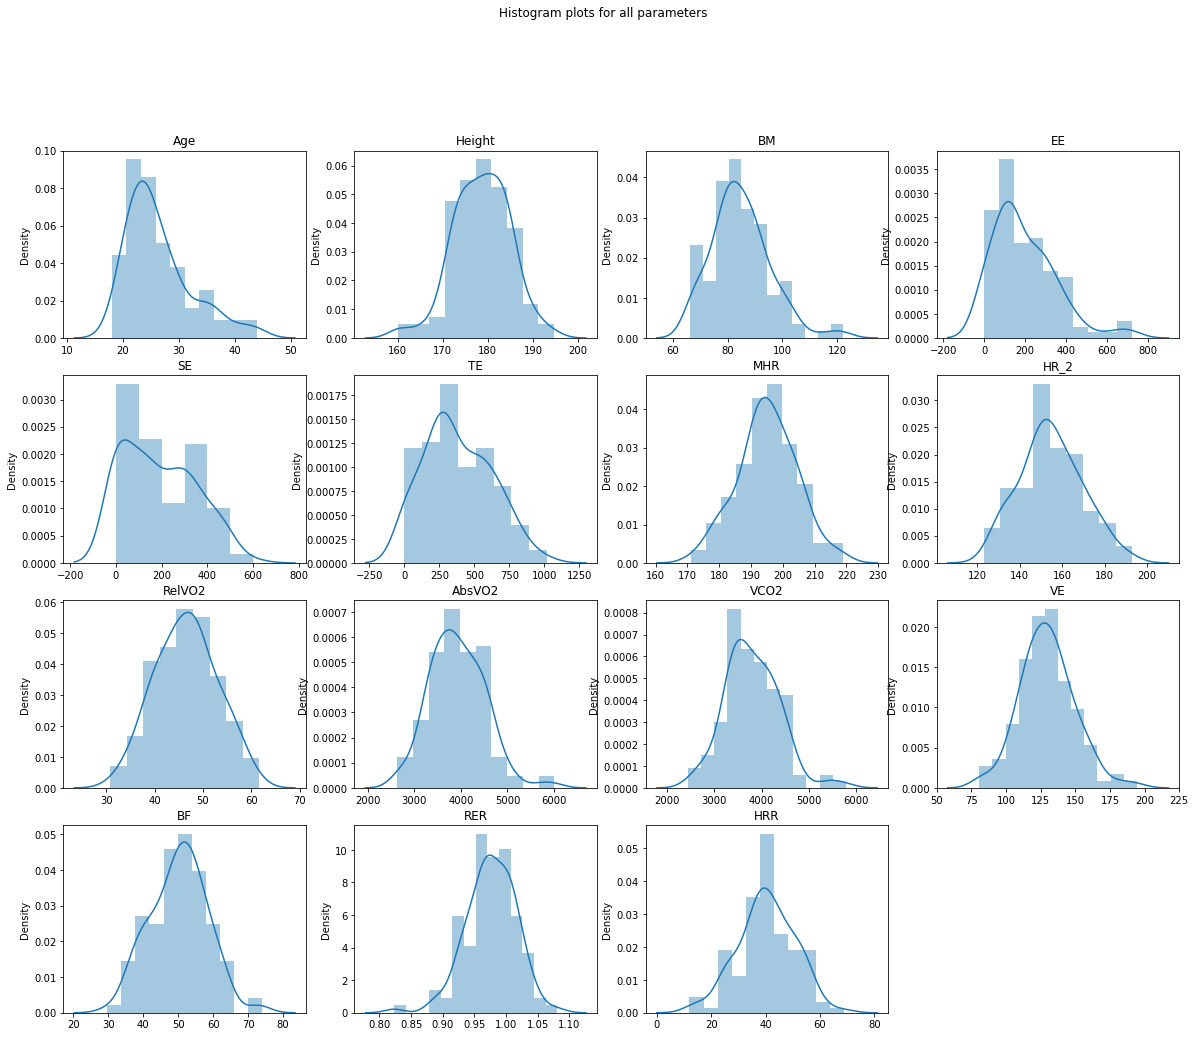

In [21]:
# Plot histograms to look at the distribution for each parameter
plt.subplots(figsize=(20, 20))
count=1

for column in df.columns[2:]:
    plt.subplot(5,4,count)         
    sns.distplot(x=df[column], hist=True, kde=True)
    plt.title(column)
    count+=1

plt.suptitle('Histogram plots for all parameters');

Note: 
- most of the parameters look normally distributed but they should be assessed further before conducting t-test. 

In [22]:
# Split the TE variable into bins of 2h interval
df['TE_hrs'] = pd.cut(df['TE'], 
                      bins=[0, 119, 239, 359, 479, 599, 1700],
                      include_lowest = True,
                      labels=['<2','2-3.9','4-5.9','6-7.9','8-9.9','>=10'])

In [23]:
# Descriptive analysis per group after changes made
df.groupby('Pass').aggregate(['mean','std','min','max'])[['Age', 'Height', 'BM', 'EE', 'SE', 'TE','MHR','HRR','RelVO2','AbsVO2','VCO2','VE','BF','RER']].T

Pass                   0            1
Age    mean    28.411765    25.528736
       std      7.435043     4.898598
       min     20.000000    18.000000
       max     44.000000    39.000000
Height mean   179.176471   178.371264
       std      7.853008     5.508976
       min    160.200000   160.000000
       max    194.600000   190.100000
BM     mean    90.354412    82.743678
       std     13.717261     8.378529
       min     66.850000    66.450000
       max    122.200000   105.200000
EE     mean   141.470588   215.988372
       std    118.331388   162.560070
       min      0.000000     0.000000
       max    460.000000   720.000000
SE     mean   156.323529   202.376471
       std    150.359714   160.123239
       min      0.000000     0.000000
       max    480.000000   600.000000
TE     mean   297.794118   416.630952
       std    216.158581   241.808835
       min      0.000000     0.000000
       max    920.000000  1020.000000
MHR    mean   194.588235   195.298851
       std      9.875337     9.139888
       min    171.000000   174.000000
       max    213.000000   219.000000
HRR    mean    36.588235    41.837049
       std     10.087849    10.339881
       min     12.000000    15.000000
       max     61.000000    69.000000
RelVO2 mean    38.687233    49.573159
       std      2.785866     4.576236
       min     30.733333    43.000000
       max     42.066667    61.650000
AbsVO2 mean  3491.315133  4098.979957
       std    454.767419   550.153526
       min   2632.700000  3060.000000
       max   4593.666667  6006.000000
VCO2   mean  3362.167592  3970.898306
       std    431.708000   532.098604
       min   2441.800000  2859.000000
       max   4158.000000  5781.333333
VE     mean   116.277359   134.956467
       std     18.165598    17.808944
       min     80.666667   105.000000
       max    146.092857   194.333333
BF     mean    47.701355    51.147200
       std      8.356908     7.898052
       min     29.666667    35.333333
       max     64.800000    74.000000
RER    mean     0.973815     0.977252
       std      0.048205     0.035773
       min      0.823333     0.883333
       max      1.080952     1.060000

## 3) Inferential statistics

### a) Check *t* statistic assumptions
    1) data sampled independently 
        ---> data were sampled independently
    2) normally distributed
        ---> use Shapiro-Wilk test
    3) homogeneity of variance 
        ---> use Levene test

**Check assumption #2: normality using Shapiro-Wilk test**

In [24]:
for i in df.columns[2:17]:
  
  # Perform Shapiro-Wilk test
    w,p = stats.shapiro(df[[i]])

  # Determine if p-value is < 0.05
    if p < 0.05:
        print(f'{i}:\t the sample does \033[4mNOT\033[0m come from a normal distribution')
    else:
        print(f'{i}:\t the sample comes from a normal distribution')

Age:	 the sample does NOT come from a normal distribution
Height:	 the sample comes from a normal distribution
BM:	 the sample does NOT come from a normal distribution
EE:	 the sample comes from a normal distribution
SE:	 the sample comes from a normal distribution
TE:	 the sample comes from a normal distribution
MHR:	 the sample comes from a normal distribution
HR_2:	 the sample comes from a normal distribution
RelVO2:	 the sample comes from a normal distribution
AbsVO2:	 the sample comes from a normal distribution
VCO2:	 the sample comes from a normal distribution
VE:	 the sample comes from a normal distribution
BF:	 the sample comes from a normal distribution
RER:	 the sample comes from a normal distribution
HRR:	 the sample comes from a normal distribution


Note: according to Shapiro-Wilk test, all parameters are normally distributed except for Age & BM. However, since our sample size > 30 observations, normality was assumed for all parameters.

**Check assumption #3: homogeneity of variance using Levene's test between groups**

In [25]:
# Choose parameters that we want to perform Levene's test
columns_num = ['Age', 'Height', 'BM', 'VCO2', 'VE', 'BF', 'RER', 'EE', 'SE', 'TE', 'MHR', 'HRR', 'RelVO2']

# Create empty DF for Levene's test results
lev_res = pd.DataFrame([])

for var in columns_num:

    # Perform Levene's test  
    df_lev = pg.homoscedasticity(df, dv=var, group='Pass')

    # Add 'Variable' to Levene's test output
    df_lev['Variable'] = var

    # Concat the empty DF with the Levene's test output
    lev_res = pd.concat([lev_res, df_lev])

# Display Levene's test results    
lev_res[['Variable','equal_var']].sort_values('equal_var', ascending=False)

Variable  equal_var
levene   Height       True
levene      MHR       True
levene      HRR       True
levene      Age      False
levene       BM      False
levene     VCO2      False
levene       VE      False
levene       BF      False
levene      RER      False
levene       EE      False
levene       SE      False
levene       TE      False
levene   RelVO2      False

Note:
homogeneity of variance is not met for the majority of variables and as a result it violates one assumption to use Student's t-test. The solution is to use Welch's t-test that does not assume homogeneity of variances.

### b) Perform Welch's *t*-test to compare means between SG and UG

Step 1: Create a custom function (welch_ttest) to perform *t*-test with unequal variances and to calculate $ES_{(M1-M2)}$ ± CI

In [26]:
def welch_ttest(x1, x2):

    # Calculate math parameters needed for the formulas
    x1 = x1[x1.notnull()]
    x2 = x2[x2.notnull()]
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1) 
    se_unpooled = np.sqrt((v1/n1)+(v2/n2)) # SE with unequal variances
    dof_w = ((v1/n1)+(v2/n2))**2 / ((v1**2/(n1**2 *(n1-1))) + (v2**2/(n2**2 *(n2-1)))) # df with unequal variances
        
    # Perform Welch's 2-sided t-test with unequal variances
    t_welch = (m1-m2) / se_unpooled
    p = 2*stats.t.cdf(-abs(t_welch), df=dof_w)
    
    # Calculate unstandardized ES(M1-M2)
    delta = m1-m2
    
    # Construct CI for ES(M1-M2)
    '''CI(u1-u2) = (M1-M2) ± t(α/2, df) * SE (unpooled)'''
    crit_t = stats.t.ppf(q=1-(0.05/2), df=dof_w)
    CI_lcl = (m1-m2) - crit_t * se_unpooled 
    CI_ucl = (m1-m2) + crit_t * se_unpooled
          
    # Prepare DF 
    return pd.DataFrame(np.array([t_welch, dof_w, n1, n2, p, delta, CI_lcl, CI_ucl]).reshape(1,-1),
                         columns=['t_welch','df_w', 'n1', 'n2', 'p','M1-M2','95%LCL','95%UCL'])

Step 2: Using the custom function, calculate *t* statistic and $ES_{(M1-M2)}$ ± CI and append to a new DF

In [27]:
# Choose parameters that we want to calculate ES(M1-M2)
columns_num = ['Age', 'Height', 'BM', 'EE', 'SE', 'TE', 'MHR', 'HRR', 'RelVO2', 'AbsVO2', 'VCO2', 'VE', 'BF', 'RER']

# Create an empty DF for t statistic results and ES(M1-M2)
ttest_res = pd.DataFrame([])

# Use the custom function created earlier (def welch_ttest) to calculate t statistic and ES
for var in columns_num:
    x = df[var] # all variables
    x_sg = df[df['Pass']==1][var] # variables in SG
    x_ug = df[df['Pass']==0][var] # variables in UG
    
    # Apply 'def welch_ttest' function
    t_welch = welch_ttest(x_sg, x_ug)

    # Append the results to the empty DF
    ttest_res = ttest_res.append(pd.DataFrame({
         
        # Overall
        'Variable': var,
        'Mean (all)': round(np.mean(x),1),
        'SD (all)': round(np.std(x),1),
        'N (all)': x.count(),
               
        # SG - success
        'Mean (SG)': round(np.mean(x_sg),1),
        'SD (SG)': round(np.std(x_sg),1),
        'N_SG': x_sg.count(),
        'N% (SG)': int(x_sg.count()/x.count()*100),
    
        # UG - fail
        'Mean (UG)': round(np.mean(x_ug),1),
        'SD (UG)': round(np.std(x_ug),1),
        'N_UG': x_ug.count(),
        'N% (UG)': int(x_ug.count()/x.count()*100),
                
        # ES(M1-M2)
        'ES(M1-M2)': round(t_welch['M1-M2'],1),
        '% diff': round(t_welch['M1-M2']/np.mean(x_ug)*100,1),
        '95%LCL': round(t_welch['95%LCL'],1),
        '95%UCL': round(t_welch['95%UCL'],1),
                
        # t statistic
        't statistic': round(t_welch['t_welch'],3),
        'p': round(t_welch['p'],3),
        'df': round(t_welch['df_w'],1),
        
        }, index=[0]), ignore_index=True)

Step 3: Create a summary table from the newly created DF for *t*-test results (ttest_res)

In [28]:
# Format parameters for the summary table

# ------------ Means ------------
ttest_res['Mean all (SD)'] = ttest_res['Mean (all)'].astype(str) +' ('+ ttest_res['SD (all)'].astype(str)+')' 
ttest_res['Mean SG (SD)'] = ttest_res['Mean (SG)'].astype(str) +' ('+ ttest_res['SD (SG)'].astype(str)+')' 
ttest_res['Mean UG (SD)'] = ttest_res['Mean (UG)'].astype(str) +' ('+ ttest_res['SD (UG)'].astype(str)+')' 

# ------------ Sample size ------------
ttest_res['N (all)'] = ttest_res['N (all)']
ttest_res['N (UG) (%)'] = ttest_res['N_UG'].astype(str) +' ('+ ttest_res['N% (UG)'].astype(str) +'%)'
ttest_res['N (SG) (%)'] = ttest_res['N_SG'].astype(str) +' ('+ ttest_res['N% (SG)'].astype(str) +'%)'

# ------------ t statistic ------------
ttest_res['p value'] =  ttest_res['p']
ttest_res['ES (M1-M2)'] = ttest_res['ES(M1-M2)']
ttest_res['diff (%)'] = round(ttest_res['% diff'])


# Create the summary table
summary = ['Variable', 'N (all)', 'Mean all (SD)', 'N (SG) (%)', 'Mean SG (SD)', 'N (UG) (%)', 'Mean UG (SD)',
            'ES (M1-M2)','diff (%)', '95%LCL', '95%UCL', 't statistic', 'df', 'p value']

# Display the summary table
ttest_res[summary]

Variable  N (all)   Mean all (SD) N (SG) (%)    Mean SG (SD) N (UG) (%)  \
0       Age      121      26.3 (5.8)   87 (71%)      25.5 (4.9)   34 (28%)   
1    Height      121     178.6 (6.2)   87 (71%)     178.4 (5.5)   34 (28%)   
2        BM      121     84.9 (10.6)   87 (71%)      82.7 (8.3)   34 (28%)   
3        EE      120   194.9 (153.9)   86 (71%)   216.0 (161.6)   34 (28%)   
4        SE      119   189.2 (157.5)   85 (71%)   202.4 (159.2)   34 (28%)   
5        TE      118   382.4 (238.9)   84 (71%)   416.6 (240.4)   34 (28%)   
6       MHR      121     195.1 (9.3)   87 (71%)     195.3 (9.1)   34 (28%)   
7       HRR      121     40.4 (10.5)   87 (71%)     41.8 (10.3)   34 (28%)   
8    RelVO2      121      46.5 (6.4)   87 (71%)      49.6 (4.5)   34 (28%)   
9    AbsVO2      121  3928.2 (588.3)   87 (71%)  4099.0 (547.0)   34 (28%)   
10     VCO2      119  3802.1 (571.5)   86 (72%)  3970.9 (529.0)   33 (27%)   
11       VE      119    129.8 (19.6)   86 (72%)    135.0 (17.7)   33 (27%)   
12       BF      119      50.2 (8.1)   86 (72%)      51.1 (7.9)   33 (27%)   
13      RER      119       1.0 (0.0)   86 (72%)       1.0 (0.0)   33 (27%)   

      Mean UG (SD)  ES (M1-M2)  diff (%)  95%LCL  95%UCL  t statistic    df  \
0       28.4 (7.3)        -2.9     -10.0    -5.7    -0.1       -2.091  44.7   
1      179.2 (7.7)        -0.8      -0.0    -3.8     2.2       -0.548  46.3   
2      90.4 (13.5)        -7.6      -8.0   -12.7    -2.5       -3.022  43.0   
3    141.5 (116.6)        74.5      53.0    21.2   127.9        2.779  82.7   
4    156.3 (148.1)        46.1      30.0   -16.0   108.2        1.481  64.5   
5    297.8 (213.0)       118.8      40.0    28.0   209.6        2.612  68.0   
6      194.6 (9.7)         0.7       0.0    -3.2     4.6        0.363  56.4   
7       36.6 (9.9)         5.2      14.0     1.1     9.4        2.554  61.7   
8       38.7 (2.7)        10.9      28.0     9.5    12.2       15.896  97.6   
9   3491.3 (448.0)       607.7      17.0   412.8   802.6        6.214  72.4   
10  3362.2 (425.1)       608.7      18.0   420.2   797.3        6.438  71.1   
11    116.3 (17.9)        18.7      16.0    11.3    26.1        5.049  57.0   
12      47.7 (8.2)         3.4       7.0     0.1     6.8        2.044  55.3   
13       1.0 (0.0)         0.0       0.0    -0.0     0.0        0.372  46.2   

    p value  
0     0.042  
1     0.587  
2     0.004  
3     0.007  
4     0.143  
5     0.011  
6     0.718  
7     0.013  
8     0.000  
9     0.000  
10    0.000  
11    0.000  
12    0.046  
13    0.711

### c) Calculate standardized $ES_{(d-statistic)}$

Step 1: Create a custom function (d_statistic) to calculate *d* statistic ± CI with unequal variances

*Reference*: Kline, R. B. (2013). Beyond significance testing: Statistics reform in the behavioral sciences (2nd ed.). American Psychological Association.

In [29]:
def d_statistic(x1, x2):

    # Calculate math parameters needed for the formulas
    x1 = x1[x1.notnull()]
    x2 = x2[x2.notnull()]
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    se_unpooled = np.sqrt((v1/n1)+(v2/n2)) # SE with unequal variances
    dof_w = ((v1/n1)+(v2/n2))**2 / ((v1**2/(n1**2 *(n1-1))) + (v2**2/(n2**2 *(n2-1)))) # df with unequal variances
   
    # Perform Welch's 2-sided t-test with unequal variances
    t_welch = (m1-m2) / se_unpooled
        
    # Calculate d statistic using t-score
    d_w = t_welch * np.sqrt((n1+n2)/(n1*n2)) 
    
    # Construct CI for d statistic
    '''CI_d = d ± t(α/2, df) * SE'''
    crit_t = stats.t.ppf(q=1-(0.05/2), df=dof_w)
    se_d = np.sqrt(((d_w**2)/(2*dof_w)) + ((n1+n2)/(n1*n2)))  
    CI_lcl = d_w - crit_t * se_d
    CI_ucl = d_w + crit_t * se_d 

    # Prepare DF   
    return pd.DataFrame(np.array([d_w, CI_lcl, CI_ucl]).reshape(1,-1), columns=['d_stat', 'CI_UCL', 'CI_LCL'])

Step 2: Using the custom function, calculate *d* statistic ± CI and append to a new DF

In [30]:
# Choose parameters that we want to calculate d statistic

columns_num = ['Age', 'Height', 'BM', 'EE', 'SE', 'TE', 'MHR', 'HRR', 'RelVO2']

# Create an empty DF for d statistic summary
df_dstat = pd.DataFrame([])

# Use the custom function created earlier (def d_statistic) to calculate d statistic and CI
for var in columns_num:
    x_sg = df[df['Pass']==1][var] # variables in SG
    x_ug = df[df['Pass']==0][var] # variables in UG
    
    # Apply 'def d_statistic' function
    t_welch = d_statistic(x_sg, x_ug)

    # Append the results to the empty DF
    df_dstat = df_dstat.append(pd.DataFrame({
        'Variable': var,
        'd statistic': round(t_welch['d_stat'],2),
        '95%LCL': round(t_welch['CI_UCL'],2),
        '95%UCL': round(t_welch['CI_LCL'],2)

        }, index=[0]), ignore_index=True)

Step 3: Create a figure for *d* statistic ± CI in relation to effect size classes and potential effects

In [31]:
# Display table sorted by absolute d statistics
df_dstat = df_dstat[['Variable','d statistic', '95%LCL', '95%UCL']]
df_dstat.sort_values('d statistic', key=abs, ascending=False)

Variable  d statistic  95%LCL  95%UCL
8   RelVO2         3.22    2.61    3.82
2       BM        -0.61   -1.04   -0.18
3       EE         0.56    0.15    0.98
5       TE         0.53    0.12    0.95
7      HRR         0.52    0.10    0.93
0      Age        -0.42   -0.84   -0.01
4       SE         0.30   -0.11    0.71
1   Height        -0.11   -0.52    0.30
6      MHR         0.07   -0.33    0.48

In [32]:
# Sort df_dstat by index descending
df_dstat = df_dstat[['Variable','d statistic', '95%LCL', '95%UCL']].sort_index(ascending=False)

# Drop RelVO2
df_dstat.drop([8], inplace=True)

# Display table
df_dstat

Variable  d statistic  95%LCL  95%UCL
7      HRR         0.52    0.10    0.93
6      MHR         0.07   -0.33    0.48
5       TE         0.53    0.12    0.95
4       SE         0.30   -0.11    0.71
3       EE         0.56    0.15    0.98
2       BM        -0.61   -1.04   -0.18
1   Height        -0.11   -0.52    0.30
0      Age        -0.42   -0.84   -0.01

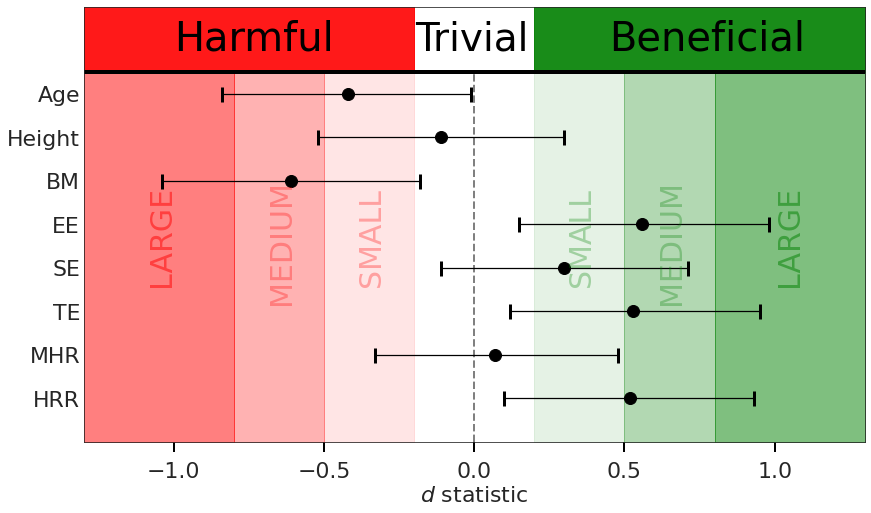

In [33]:
# Create the figure
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(14, 8))

n=0

for index, i in df_dstat.iterrows():
   
    # Plot ES (d statistic)   
    y = [n]
    x = [i["d statistic"]]
    ax.plot(x, y, "o", color='black', markersize = 12)
    
    # Plot CI
    y = [n,n]
    x = [i["95%LCL"], i["95%UCL"]]
    ax.plot(x, y, "|-", markersize = 15, markeredgewidth=3, linewidth=1.25, color='black')
    
    n+=1

# Set axis
ax.set_xlim(xmin=-1.3, xmax=1.3)
ax.set_ylim(-1,8)
ax.set_yticks([])
ax.yaxis.set_ticks(np.arange(-1, 10))
ax.set_xlabel('$\it{d}$ statistic')
ax.set_ylabel('')
ax.set_yticks((0,1,2,3,4,5,6,7))
ax.set_yticklabels(('HRR','MHR','TE','SE','EE','BM','Height','Age'))
ax.tick_params(axis='x', which='both', length=10, width=2, direction='out', color='black', pad=10)
ax.tick_params(axis='y', which='both', length=0, width=0)

# Add lines around figure
sns.despine(left=False, right=False, bottom=False, top=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()): item.set_fontsize(22)

# Add lines to the figure
plt.vlines(x=0, ymin=-1, ymax=7.5, ls='--', linewidth=2, color='grey', zorder=2)
ax.axhline(7.5, color='black', linestyle='-', alpha=1, lw=4)

# Add background colours
ax.fill_between(x=[0.2,0.5], y1=[-1,-1], y2=[7.5,7.5], color='green', alpha=0.1, zorder=1)
ax.fill_between(x=[0.5,0.8], y1=[-1,-1], y2=[7.5,7.5], color='green', alpha=0.3, zorder=1)
ax.fill_between(x=[0.8,1.3], y1=[-1,-1], y2=[7.5,7.5], color='green', alpha=0.5, zorder=1)
ax.fill_between(x=[-0.2,-0.5], y1=[-1,-1], y2=[7.5,7.5], color='red', alpha=0.1, zorder=1)
ax.fill_between(x=[-0.5,-0.8], y1=[-1,-1], y2=[7.5,7.5], color='red', alpha=0.3, zorder=1)
ax.fill_between(x=[-0.8,-1.3], y1=[-1,-1], y2=[7.5,7.5], color='red', alpha=0.5, zorder=1)
ax.fill_between(x=[0.2,1.3], y1=[7.5,7.5], y2=[10,10], color='green', alpha=0.9, zorder=1)
ax.fill_between(x=[-1.3,-0.2], y1=[7.5,7.5], y2=[10,10], color='red', alpha=0.9, zorder=1)

# Add text on the figure
plt.annotate('Harmful', (-1, 8), fontsize=40, color='black')
plt.annotate('Trivial', (-0.195, 8), fontsize=39, color='black')
plt.annotate('Beneficial', (0.45, 8), fontsize=40, color='black')
plt.annotate('SMALL', (0.31, 2.7), fontsize=30, color='green', rotation='vertical', alpha=0.3)
plt.annotate('SMALL', (-0.39, 2.7), fontsize=30, color='red', rotation='vertical', alpha=0.3)
plt.annotate('MEDIUM', (0.61, 2.3), fontsize=30, color='green', rotation='vertical', alpha=0.3)
plt.annotate('MEDIUM', (-0.69, 2.3), fontsize=30, color='red', rotation='vertical', alpha=0.3)
plt.annotate('LARGE', (1, 2.7), fontsize=30, color='green', rotation='vertical', alpha=0.5)
plt.annotate('LARGE', (-1.09, 2.7), fontsize=30, color='red', rotation='vertical', alpha=0.5)

# Save and show
plt.savefig(fname='Figure 1', format='pdf', dpi=300, orientation='landscape', papertype='letter', transparent=True, bbox_inches='tight')
plt.show()

### d) Perform Welch ANOVA test to compare the three CR fitness zones

Next, we will split the applicants into colour coded groups ("zone") to account for total variability (± 5.6%) in their physical performance from one day to another.
- **Green zone**: applicants with $RelVO_2$ values > 45 (42.5 + 5.6%)
- **Red zone**: applicants with $RelVO_2$ values < 40 (42.5 - 5.6%)
- **Yellow zone**: applicants who falls between the red and green zones

Step 1: divide the dataset into three CR fitness zones

In [34]:
# Create the colour coded zones based on RelVO2 values
df['Zone'] = pd.cut(df['RelVO2'], bins=[0, 40, 45, 100], include_lowest=True, labels=['Red','Yellow','Green'])

In [35]:
# Calculate how many applicants in each zone
df.groupby('Zone')['Age'].agg(['count'])

count
Zone         
Red        21
Yellow     33
Green      67

In [36]:
# Calculate mean and median values for each zone
columns_num = ['Age', 'Height', 'BM', 'EE', 'SE', 'TE', 'MHR', 'HRR']
df.groupby('Zone')[columns_num].agg(['mean', 'median']).T

Zone                  Red      Yellow       Green
Age    mean     28.285714   27.848485   24.985075
       median   27.000000   26.000000   24.000000
Height mean    179.433333  178.160606  178.550746
       median  179.600000  179.900000  178.000000
BM     mean     92.835714   85.833333   81.920896
       median   91.000000   84.600000   80.800000
EE     mean    108.571429  169.393939  235.075758
       median  120.000000  135.000000  230.000000
SE     mean    159.523810  169.757576  208.692308
       median  120.000000  120.000000  180.000000
TE     mean    268.095238  339.151515  442.187500
       median  220.000000  300.000000  420.000000
MHR    mean    195.666667  194.424242  195.253731
       median  198.000000  194.000000  195.000000
HRR    mean     34.476190   40.090909   42.340646
       median   35.000000   40.000000   43.000000

In [37]:
# Check for homogeneity among zones using Levene's test
lev_res = pd.DataFrame([])

for var in columns_num:
    
    # Perform the Levene's test
    df_lev = pg.homoscedasticity(df, dv=var, group='Zone')
    
    # Add Variable to the DF
    df_lev['Variable'] = var

    # Concat the empty DF with the Levene's test output
    lev_res = pd.concat([lev_res, df_lev])

# Display equality of variance output  
lev_res[['Variable','equal_var']].sort_values('equal_var', ascending=False)

Variable  equal_var
levene      Age       True
levene   Height       True
levene       BM       True
levene      MHR       True
levene      HRR       True
levene       EE      False
levene       SE      False
levene       TE      False

Note: again since the assumption of equal variances is not met for all variables, we will use the Welch ANOVA test which does not assume equal variances and equal sample size.

Step 2: conduct ANOVA test to identify the differences between zones

(i) Conduct Welch ANOVA test

In [38]:
from pingouin import welch_anova, read_dataset

# Choose parameters that we want to perform an ANOVA test
columns = ['Age', 'Height', 'BM', 'EE', 'SE', 'TE', 'MHR', 'HRR', 'RelVO2']

# Create empty DF for ANOVA results
df_anova = pd.DataFrame([])

for var in columns[:-1]:

    # Perform the ANOVA
    anova = pg.welch_anova(dv=var, between='Zone', data=df)
    
    # Add variables to the ANOVA output
    anova['Variable'] = var

    # Append the ANOVA output to the empty DF
    df_anova = df_anova.append(anova)

# Display ANOVA p-values results
df_anova[['Variable','p-unc']].sort_values('p-unc', ascending=True)

Variable     p-unc
0       EE  0.000137
0       BM  0.002435
0       TE  0.003581
0      HRR  0.011748
0      Age  0.027188
0       SE  0.340072
0   Height  0.834318
0      MHR  0.882089

(ii) Conduct Games-Howell pairwise comparison to identify where the difference is. 

In [39]:
# Choose parameters that we want to perform a post-hoc test
columns = ['Age','BM','EE','TE','HRR']

# Create empty DF for post-hoc results
df_gh = pd.DataFrame([])

for var in columns:

    # Perform Games-Howell post-hoc test
    post_hoc = pg.pairwise_gameshowell(dv=var, between='Zone', data=df)
    
    # Add variables to the post-hoc output
    post_hoc['Variable'] = var

    # Append the post-hoc output to the empty DF
    df_gh = df_gh.append(post_hoc)

# Display post-hoc results
df_gh[['Variable','A','B','mean(A)','mean(B)','diff','pval']].sort_values('pval', ascending=True)

Variable       A       B     mean(A)     mean(B)        diff      pval
1       EE     Red   Green  108.571429  235.075758 -126.504329  0.001000
1       TE     Red   Green  268.095238  442.187500 -174.092262  0.003397
1       BM     Red   Green   92.835714   81.920896   10.914819  0.004657
1      HRR     Red   Green   34.476190   42.340646   -7.864455  0.009244
2      Age  Yellow   Green   27.848485   24.985075    2.863410  0.082518
2       EE  Yellow   Green  169.393939  235.075758  -65.681818  0.085715
0      HRR     Red  Yellow   34.476190   40.090909   -5.614719  0.092577
0       EE     Red  Yellow  108.571429  169.393939  -60.822511  0.094792
1      Age     Red   Green   28.285714   24.985075    3.300640  0.105920
2       TE  Yellow   Green  339.151515  442.187500 -103.035985  0.115639
0       BM     Red  Yellow   92.835714   85.833333    7.002381  0.119350
2       BM  Yellow   Green   85.833333   81.920896    3.912438  0.153940
0       TE     Red  Yellow  268.095238  339.151515  -71.056277  0.438822
2      HRR  Yellow   Green   40.090909   42.340646   -2.249737  0.509438
0      Age     Red  Yellow   28.285714   27.848485    0.437229  0.900000

Step 3: create boxplots to compare red and green zones for EE, TE, BM, and HRR

(i) Compare red and green zones for EE and TE

In [40]:
# Convert DF from wide to long to create boxplots
dfl = pd.melt(df, id_vars='Zone', value_vars=['TE','EE'])
dfl['Train_hrs'] = dfl['value']/60

In [41]:
# Calculate median values for each zone
columns = ['BM','EE','TE','HRR']
df.groupby('Zone')[columns].agg(['median']).T

Zone          Red  Yellow  Green
BM  median   91.0    84.6   80.8
EE  median  120.0   135.0  230.0
TE  median  220.0   300.0  420.0
HRR median   35.0    40.0   43.0

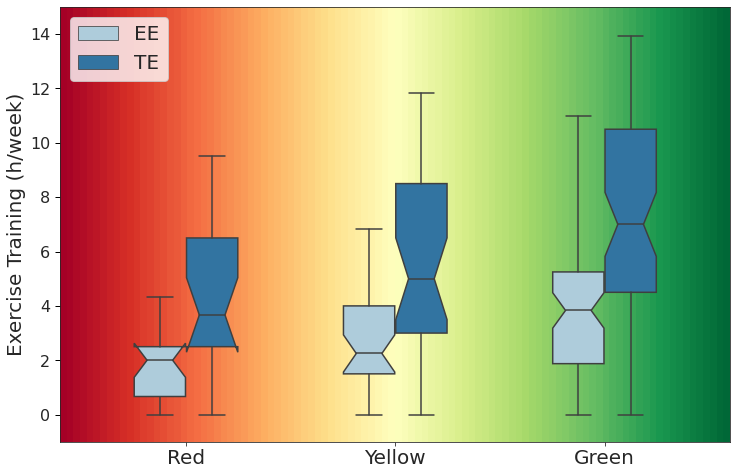

In [42]:
# Create notched boxplots
sns.set_style("ticks")
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

# Plot boxplot
ax = sns.boxplot(x='Zone', y='Train_hrs', hue='variable', data=dfl, hue_order=['EE','TE'], whis=[0,98],
                 notch=True, linewidth=1.5, showfliers=False, width=0.5, palette='Paired')
                 #medianprops=dict(linestyle='-', linewidth=5, color='black'))

# Set axis
ax.set_yticks(range(0,15,2))
plt.ylabel('Exercise Training (h/week)', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=20)
plt.xlabel('')
ax.tick_params(axis='y', which='both', length=5, width=1, direction='out', color='black', pad=5)

# Add horizontal line
#ax.axhline(8, c="#01579B", linestyle='dashed', alpha=1, lw=2)

# Add background colours
gradient = np.linspace(start=0, stop=1, num=100).reshape(1, -1)
plt.imshow(gradient , extent=[-0.6, 2.6, -1, 15], aspect='auto', cmap='RdYlGn')

# Legend
plt.legend(fontsize=20)

# Save and show
plt.savefig(fname='Figure 3', format='pdf', dpi=300, orientation='landscape', papertype='letter', transparent=True, bbox_inches='tight')
plt.show()

(ii) Compare red and green zones for BM and HRR

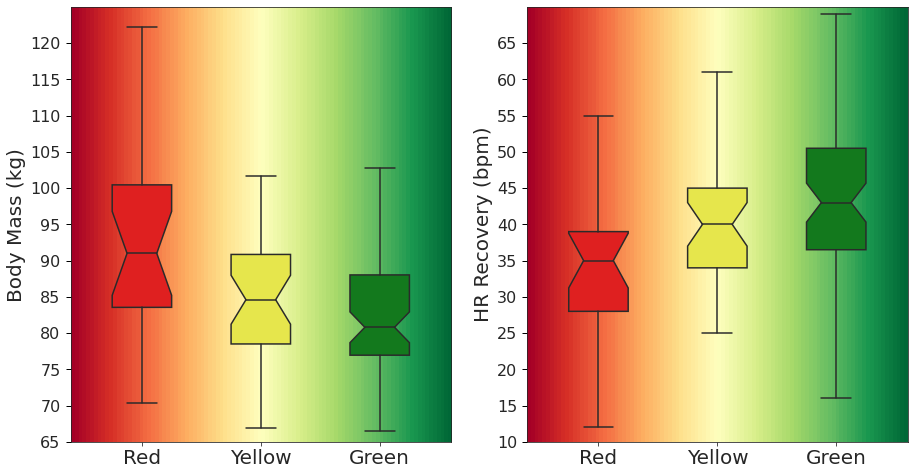

In [43]:
# Create notched boxplots
sns.set_style("ticks")
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(121)

# Create an array with the colours to use for the boxes
colours = ['red','#FFFF33','#028A0F']

# Create custom pallette
customPallette = sns.set_palette(sns.set_palette(colours))


# --------------- Boxplot for BM -----------------------------------------------------------------------------------------

# Plot boxplot for BM
plt.subplot(121)
ax = sns.boxplot(x='Zone', y='BM', data=df, notch=True, linewidth=1.5, showfliers=False, width=0.5, palette=customPallette)
                 
# Set axis for BM
ax.set_yticks(range(65,125,5))
plt.ylabel('Body Mass (kg)', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=20)
plt.xlabel('')
ax.tick_params(axis='y', which='major', length=5, width=1, direction='out', color='black', pad=5)

# Add horizontal line
#ax.axhline(83, c="#01579B", linestyle='dashed', alpha=1, lw=2)

# Add background colours for BM
gradient = np.linspace(start=0, stop=1, num=100).reshape(1, -1)
plt.imshow(gradient , extent=[-0.6, 2.6, 65, 125], aspect='auto', cmap='RdYlGn')


# --------------- Boxplot for HRR -----------------------------------------------------------------------------------------

# Plot boxplot for HRR
plt.subplot(122)
ax = sns.boxplot(x='Zone', y='HRR', data=df, notch=True, linewidth=1.5, showfliers=False, width=0.5, palette=customPallette)

# Set axis for HRR
ax.set_yticks(range(10,70,5))
plt.ylabel('HR Recovery (bpm)', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=20)
plt.xlabel('')
ax.tick_params(axis='y', which='major', length=5, width=1, direction='out', color='black', pad=5)

# Add horizontal line
#ax.axhline(40, c="#01579B", linestyle='dashed', alpha=1, lw=2)

# Add background colours for HRR
gradient = np.linspace(start=0, stop=1, num=100).reshape(1, -1)
plt.imshow(gradient , extent=[-0.6, 2.6, 10, 70], aspect='auto', cmap='RdYlGn')

# Save and show
plt.savefig(fname='Figure 2', format='pdf', dpi=300, orientation='landscape', papertype='letter', transparent=True, bbox_inches='tight')
plt.show()

### e) Percentage of applicants who passed the test with recommendations

#### (i) EE >= 4 h/wk

In [44]:
# 1) Calculate number of applicants performed >= 4h/wk EE

    # a) Define the function
def array_count(df):
    count = 0
    
    for num in df.EE:
        if num >=230:
            count +=1
    return(count)

    # b) Call the function
array_count(df)

    # c) Raname the function
EE_count = array_count(df)

print(f'The number of applicants who performed EE greater than 4h/wk = {EE_count}')

The number of applicants who performed EE greater than 4h/wk = 45


In [45]:
# 2) Calculate number of applicants performed >= 4h/wk EE AND passed

    # a) Define the function
def count(df):
    count = 0
    
    for index, row in df.iterrows():
        if row['EE'] >=230 and row['Pass']==1:
            count +=1
    return(count)

    # b) Call the function
count(df)

    # c) Raname the function
EE_count_pass = count(df)

print(f'The number of applicants who performed EE greater than 4h/wk and passed = {EE_count_pass}')

The number of applicants who performed EE greater than 4h/wk and passed = 39


In [46]:
# 3) Calculate % applicants performed >= 4h/wk EE AND passed

EE_percentage = EE_count_pass / EE_count *100

print(f'The percentage of applicants who passed and performed EE greater than 4h/wk = {round(EE_percentage)}%')

The percentage of applicants who passed and performed EE greater than 4h/wk = 87%


#### (ii) TE >= 7 h/wk

In [47]:
# 1) Calculate number of applicants performed >= 7h/wk TE

    # a) Define the function
def array_count(df):
    count = 0
    for num in df.TE:
        if num >=420:
            count +=1
    return(count)

    # b) Call the function
array_count(df)

    # c) Raname the function
TE_count = array_count(df)

print(f'The number of applicants who performed TE greater than 7h/wk = {TE_count}')

The number of applicants who performed TE greater than 7h/wk = 51


In [48]:
# 2) Calculate number of applicants performed >= 7h/wk TE AND passed

    # a) Define the function
def count(df):
    count = 0
    for index, row in df.iterrows():
        if row['TE'] >=420 and row['Pass']==1:
            count +=1
    return(count)

    # b) Call the function
count(df)

    # c) Raname the function
TE_count_pass = count(df)

print(f'The number of applicants who performed TE greater than 7h/wk and passed = {TE_count_pass}')

The number of applicants who performed TE greater than 7h/wk and passed = 42


In [49]:
# 3) Calculate % applicants performed >= 7h/wk TE AND passed

TE_percentage = TE_count_pass / TE_count *100

print(f'The percentage of applicants who passed and performed TE greater than 7h/wk = {round(TE_percentage)}%')

The percentage of applicants who passed and performed TE greater than 7h/wk = 82%
